In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
sys.path.insert(1, '../SPOCKalt')
import plotFunctions

In [2]:
dataset = pd.read_csv('../modeldata/zfixed3brfill.csv')

In [3]:
dataset

,index,EMcrossnear,MMRstrengthnear,twoMMRstrengthnear,MMRstrengthWnear,twoMMRstrengthWnear,EMcrossfar,MMRstrengthfar,twoMMRstrengthfar,MMRstrengthWfar,...,EMnear,EPnear,EMfar,EPfar,EMouter,EPouter,prelimStable,Stable,instability_time,shadow_instability_time
0,0,0.221502,0.098431,9.878834e-03,0.013642,0.007103,0.300893,0.093415,0.001595,0.003112,...,0.055687,0.023629,0.061076,0.053981,0.007530,0.004649,True,False,1.235665e+07,8.315223e+07
1,1,0.190647,0.009185,1.703367e-03,0.019474,0.015939,0.403777,0.249341,0.003783,0.008003,...,0.002851,0.013028,0.085497,0.017682,0.082772,0.071393,True,False,1.348749e+05,2.133072e+05
2,2,0.125660,0.426660,1.310313e-01,0.033117,0.022168,0.720557,0.000531,0.000266,0.000287,...,0.092323,0.011262,0.040973,0.042240,0.054516,0.051803,True,False,1.276428e+04,9.321863e+03
3,3,0.216684,0.002876,1.857040e-07,0.004557,0.001577,0.235460,0.027521,0.013379,0.001208,...,0.000141,0.000034,0.057376,0.013245,0.057501,0.040897,True,True,1.000000e+09,1.000000e+09
4,4,0.024455,0.423830,1.145611e-01,0.002436,0.000582,0.034058,0.079484,0.053510,0.003246,...,0.029519,0.007250,0.018995,0.006777,0.011759,0.007401,True,False,8.791890e+01,8.791890e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138538,138538,0.082222,0.447117,2.475049e-02,0.016075,0.016330,0.664222,0.001175,0.000000,0.004940,...,0.030868,0.038914,0.154595,0.098020,0.132139,0.073446,True,False,6.990387e+05,8.267916e+05
138539,138539,0.251338,0.749336,1.701463e-03,0.003767,0.002099,0.272822,0.017013,0.004713,0.007723,...,0.041120,0.029073,0.030636,0.017757,0.043224,0.003523,True,False,3.075749e+08,6.576003e+08
138540,138540,0.131799,0.324267,2.940005e-02,0.017772,0.017278,0.366664,0.059764,0.006983,0.001049,...,0.037893,0.051811,0.083804,0.064086,0.047189,0.045870,True,False,1.193822e+07,3.363291e+07
138541,138541,0.209454,1.205802,5.207774e-02,0.033014,0.057969,0.395073,0.029166,0.002591,0.020718,...,0.233044,0.068171,0.055297,0.091233,0.217038,0.183490,True,False,2.064407e+08,4.316851e+07


In [4]:
def hasnull(row):
    numnulls = row.isnull().sum()
    if numnulls == 0:
        return 0
    else:
        return 1

def tmax(row):
    #sim = get_sim(row, csvfolder)
    tmax = 1e4 # replace with a calculation of tmax
    return tmax

In [5]:
%%time
if 'hasnull' not in dataset.columns:
    dataset['hasnull'] = dataset.apply(hasnull, axis=1)
    #dataset['tmax'] = dataset.apply(tmax, axis=1)
    # dataset['tmax'] = dataset.apply(lambda x:1e4, axis=1) # this version would just set tmax=1e4 for all of them

    #dataset.to_csv(trainingdatafolder+"trainingdata.csv", encoding='ascii')

CPU times: user 6.16 s, sys: 95.8 ms, total: 6.25 s
Wall time: 6.25 s


In [6]:
mask = (dataset['hasnull'] == 0 )
filtData = dataset[mask]

In [7]:
filtData.columns

Index(['index', 'EMcrossnear', 'MMRstrengthnear', 'twoMMRstrengthnear',
       'MMRstrengthWnear', 'twoMMRstrengthWnear', 'EMcrossfar',
       'MMRstrengthfar', 'twoMMRstrengthfar', 'MMRstrengthWfar',
       'twoMMRstrengthWfar', 'EMcrossouter', 'MMRstrengthouter',
       'twoMMRstrengthouter', 'MMRstrengthWouter', 'twoMMRstrengthWouter',
       'MEGNO', '3BRfirstfillfac', 'threeBRfillfac', 'chiSec', 'eccMag',
       'eccDir', 'pomegastd', 'p2/1', 'p3/2', 'hillRad1', 'e1', 'a1', 'P1',
       'pomega1', 'Omega1', 'w1', 'm1', 'hillRad2', 'e2', 'a2', 'P2',
       'pomega2', 'Omega2', 'w2', 'm2', 'hillRad3', 'e3', 'a3', 'P3',
       'pomega3', 'Omega3', 'w3', 'm3', 'EMnear', 'EPnear', 'EMfar', 'EPfar',
       'EMouter', 'EPouter', 'prelimStable', 'Stable', 'instability_time',
       'shadow_instability_time', 'hasnull'],
      dtype='object')

In [8]:
import plotFunctions

In [9]:
def getscale(Pratio):
    val = plotFunctions.getval(Pratio)
    return (val[1]+val[0])
#/(val[1]-val[0]

In [10]:
from multiprocessing import Pool

In [11]:
if __name__ == "__main__":  # confirms that the code is under main function
    temp = (1/filtData['p3/2'])
    #bound = test = np.linspace(0, 138543, num=138544, endpoint=True, retstep=False, dtype=int, axis=0)
    with Pool(60) as p:
        new = list(p.map(getscale, np.array((1/filtData['p3/2']))))
   
    filtData['3/2_order']=new

    with Pool(60) as p:
        new = list(p.map(getscale, np.array((1/filtData['p2/1']))))
   
    filtData['2/1_order']=new
 

In [23]:
#filtData['minOrder']= list(map((lambda a,b: a if a>=b else b),filtData['3/2_order'],filtData['2/1_order']))

In [24]:
filtData

,index,EMcrossnear,MMRstrengthnear,twoMMRstrengthnear,MMRstrengthWnear,twoMMRstrengthWnear,EMcrossfar,MMRstrengthfar,twoMMRstrengthfar,MMRstrengthWfar,...,EMouter,EPouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,3/2_order,2/1_order,rat
0,0,0.221502,0.098431,9.878834e-03,0.013642,0.007103,0.300893,0.093415,0.001595,0.003112,...,0.007530,0.004649,True,False,1.235665e+07,8.315223e+07,0,5,33,0.909861
1,1,0.190647,0.009185,1.703367e-03,0.019474,0.015939,0.403777,0.249341,0.003783,0.008003,...,0.082772,0.071393,True,False,1.348749e+05,2.133072e+05,0,8,23,0.781132
2,2,0.125660,0.426660,1.310313e-01,0.033117,0.022168,0.720557,0.000531,0.000266,0.000287,...,0.054516,0.051803,True,False,1.276428e+04,9.321863e+03,0,13,57,0.529166
3,3,0.216684,0.002876,1.857040e-07,0.004557,0.001577,0.235460,0.027521,0.013379,0.001208,...,0.057501,0.040897,True,True,1.000000e+09,1.000000e+09,0,19,7,0.977289
4,4,0.024455,0.423830,1.145611e-01,0.002436,0.000582,0.034058,0.079484,0.053510,0.003246,...,0.011759,0.007401,True,False,8.791890e+01,8.791890e+01,0,55,199,1.014094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138538,138538,0.082222,0.447117,2.475049e-02,0.016075,0.016330,0.664222,0.001175,0.000000,0.004940,...,0.132139,0.073446,True,False,6.990387e+05,8.267916e+05,0,17,13,1.906979
138539,138539,0.251338,0.749336,1.701463e-03,0.003767,0.002099,0.272822,0.017013,0.004713,0.007723,...,0.043224,0.003523,True,False,3.075749e+08,6.576003e+08,0,17,12,0.974786
138540,138540,0.131799,0.324267,2.940005e-02,0.017772,0.017278,0.366664,0.059764,0.006983,0.001049,...,0.047189,0.045870,True,False,1.193822e+07,3.363291e+07,0,13,11,0.753632
138541,138541,0.209454,1.205802,5.207774e-02,0.033014,0.057969,0.395073,0.029166,0.002591,0.020718,...,0.217038,0.183490,True,False,2.064407e+08,4.316851e+07,0,8,7,0.807193


In [25]:
plot = filtData

In [26]:
plot['rat'] = plot['p2/1']/plot['p3/2']

In [33]:
plot = filtData.drop(filtData[filtData['threeBRfillfac'] >200].index)
plot = plot.drop(plot[plot['rat']>5].index)
plot = plot.drop(plot[plot['3/2_order']>70].index)
# plot = plot.drop(plot[plot['MMRstrengthnear']<.5].index)


In [28]:
import math
import numpy as np

In [29]:
import numpy as np
def plotfill(x):
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = math.sqrt(-np.log(1-(x**(-1))))
    return p1+p2

In [30]:
plotfill(1.1)

2.5278175491242747

In [31]:
fillList = np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: x+5.5, y))

/tmp/ipykernel_29433/3149472046.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=((plot['3/2_order'])), cmap=plt.cm.get_cmap("cool",20),alpha=1)


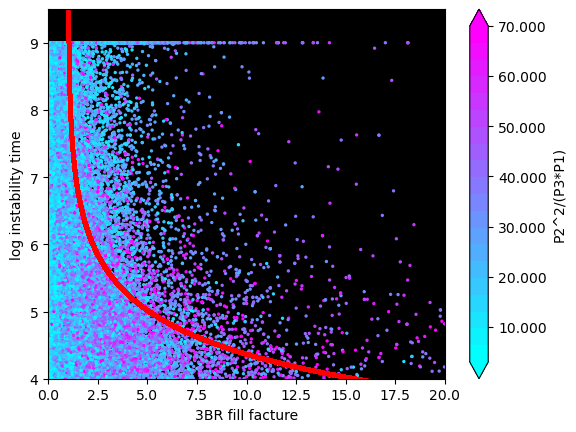

In [34]:
ax = plt.axes()
plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=((plot['nearThetaSTD'])), cmap=plt.cm.get_cmap("cool",20),alpha=1)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("3BR fill facture")
plt.ylabel("log instability time")
cbar.set_label('P2^2/(P3*P1)')
ax.set_facecolor("black")

In [24]:
plot['ecrossOut']=(plot['a3']-plot['a2'])/plot['a2']

In [25]:
plot.iloc[131943]

index                               132252
EMcrossnear                       0.257694
MMRstrengthnear                   0.050485
twoMMRstrengthnear                0.010908
MMRstrengthWnear                  0.024768
                                ...       
instability_time           18409143.358284
shadow_instability_time     9825673.148296
hasnull                                  0
rat                               1.064201
ecrossOut                         0.257694
Name: 132252, Length: 62, dtype: object

/tmp/ipykernel_9701/113319569.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(plot['MMRstrengthnear']), cmap=plt.cm.get_cmap("cool",20),alpha=1)


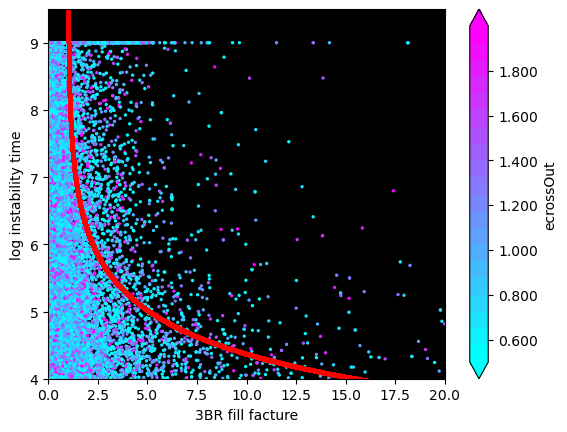

In [53]:
ax = plt.axes()
plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(plot['MMRstrengthnear']), cmap=plt.cm.get_cmap("cool",20),alpha=1)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("3BR fill facture")
plt.ylabel("log instability time")
cbar.set_label('ecrossOut')
ax.set_facecolor("black")